- Load dataset, check null values, data types, head.
- Perform work frequency counts and other such analyses (also graphically)
- Preprocesse the data (Removing punctuation, convert to lowercase, tokenizer)
- Split the data and train baseline model
- Train final model and asses performance


# Load and check dataset

In [104]:
import pandas as pd 
import numpy as np

In [5]:
# Load dataset
disneyland = pd.read_csv("DisneylandReviews.csv")

In [6]:
# Check dataset
disneyland.head(10)

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   
5  670591897       3     2019-4             Singapore   
6  670585330       5     2019-4                 India   
7  670574142       3     2019-3              Malaysia   
8  670571027       2     2019-4             Australia   
9  670570869       5     2019-3                 India   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong  
5  Have been to Disney World, Disneyland Anaheim ...  Disneyland_HongKong  
6  Great place! Your day will go by and you won't...  Disneyland_HongKong  
7  Think of it as an intro to Disney magic for th...  Disneyland_HongKong  
8  Feel so let down with this place,the Disneylan...  Disneyland_HongKong  
9  I can go on talking about Disneyland. Whatever...  Disneyland_HongKong

In [7]:
# Check dataframe shape
disneyland.shape

(42656, 6)

In [8]:
# Dataset information
disneyland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [9]:
# Drop rows with missing values, if any
disneyland.dropna(inplace=True)

In [10]:
# Check dataframe shape
disneyland.shape

(42656, 6)

In [11]:
# Check value counts for each Disneyland branch
disneyland['Branch'].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

In [12]:
# Split Year_Month column for analysis
disneyland[['Year','Month']] = disneyland.Year_Month.str.split("-",expand=True,)

In [13]:
disneyland.head(15)

Review_ID  Rating Year_Month     Reviewer_Location  \
0   670772142       4     2019-4             Australia   
1   670682799       4     2019-5           Philippines   
2   670623270       4     2019-4  United Arab Emirates   
3   670607911       4     2019-4             Australia   
4   670607296       4     2019-4        United Kingdom   
5   670591897       3     2019-4             Singapore   
6   670585330       5     2019-4                 India   
7   670574142       3     2019-3              Malaysia   
8   670571027       2     2019-4             Australia   
9   670570869       5     2019-3                 India   
10  670443403       5     2019-4         United States   
11  670435886       5     2019-4                Canada   
12  670376905       4     2019-4             Australia   
13  670324965       5     2019-4           Philippines   
14  670274554       5     2018-9             Australia   

                                          Review_Text               Branch  \
0   If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1   Its been a while since d last time we visit HK...  Disneyland_HongKong   
2   Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3   HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4   the location is not in the city, took around 1...  Disneyland_HongKong   
5   Have been to Disney World, Disneyland Anaheim ...  Disneyland_HongKong   
6   Great place! Your day will go by and you won't...  Disneyland_HongKong   
7   Think of it as an intro to Disney magic for th...  Disneyland_HongKong   
8   Feel so let down with this place,the Disneylan...  Disneyland_HongKong   
9   I can go on talking about Disneyland. Whatever...  Disneyland_HongKong   
10  Disneyland never cease to amaze me! I've been ...  Disneyland_HongKong   
11  We spent the day here with our grown kids and ...  Disneyland_HongKong   
12  We spend two days, the second day went early t...  Disneyland_HongKong   
13  It was indeed the happiest place on earth! My ...  Disneyland_HongKong   
14  This place is HUGE! Definately need more than ...  Disneyland_HongKong   

    Year Month  
0   2019     4  
1   2019     5  
2   2019     4  
3   2019     4  
4   2019     4  
5   2019     4  
6   2019     4  
7   2019     3  
8   2019     4  
9   2019     3  
10  2019     4  
11  2019     4  
12  2019     4  
13  2019     4  
14  2018     9

# Graphical Analyses 

In [14]:
### Import packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

import plotly.tools as tls
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [15]:
### Check reviews counts for each park branch
fig = px.histogram(disneyland, x = "Branch", title="Disneyland Parks Review Count",color='Branch', color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [16]:
### Plot rating counts for all parks

fig = px.histogram(disneyland, x="Rating", color = 'Branch',barmode='group',color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(title_text= "Disneyland Parks Rating Counts")
fig.show()

In [17]:
# Plot mean rating for each park

means = disneyland.groupby('Branch')['Rating'].mean()

fig = px.bar(means, x=means.index, y='Rating', color=means.index,
             text='Rating',color_discrete_sequence=px.colors.qualitative.Dark24,)

fig.update_layout(title_text="Disneyland Parks Mean Rating")
fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
                  
fig.show()

In [18]:
# Create dataframe with mean overall Parks rating by reviewer location (excluding those with < 30 reviews)
location_mean = disneyland.groupby('Reviewer_Location').mean('Rating')

location_counts = disneyland['Reviewer_Location'].value_counts()

location_mean_merged = location_mean.merge(location_counts, left_index=True, right_index=True)

location_mean_sorted = location_mean_merged.sort_values(by=['Reviewer_Location'], ascending=False)

location_mean_final = location_mean_sorted[location_mean_sorted['Reviewer_Location'] > 30] 


In [19]:
# Plot the above dataframe
fig = px.bar(location_mean_final, x=location_mean_final.index, y='Rating', color=location_mean_final.index,
             text='Rating',color_discrete_sequence=px.colors.qualitative.Dark24,)

fig.update_layout(title_text="Disneyland Parks Mean Rating by Reviewer Location")
fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

                  
fig.show()


In [20]:
# Plot parks mean rating over time 
year_mean = disneyland.groupby('Year').mean('Rating')
year_mean = year_mean.drop('missing')

In [21]:
fig = px.line(year_mean, x=year_mean.index, y="Rating")
fig.update_layout(title_text="Disneyland Parks Mean Rating")
fig.show()

In [22]:
#Plot individual park ratings over time

hk = disneyland.loc[disneyland['Branch'] == 'Disneyland_HongKong']
paris = disneyland.loc[disneyland['Branch'] == 'Disneyland_Paris']
ca = disneyland.loc[disneyland['Branch'] == 'Disneyland_California']

In [23]:
hk_year_mean = hk.groupby('Year').mean('Rating')
hk_year_mean = hk_year_mean.drop('missing')

In [24]:
fig = px.line(hk_year_mean, x=hk_year_mean.index, y="Rating")
fig.update_layout(title_text="Hong Kong Disneyland Mean Rating")
fig.show()

In [25]:
paris_year_mean = paris.groupby('Year').mean('Rating')
paris_year_mean = paris_year_mean.drop('missing')

In [26]:
fig = px.line(paris_year_mean, x=paris_year_mean.index, y="Rating")
fig.update_layout(title_text="Disneyland Paris Mean Rating")
fig.show()

In [27]:
ca_year_mean = ca.groupby('Year').mean('Rating')
ca_year_mean = ca_year_mean.drop('missing')

In [28]:
fig = px.line(ca_year_mean, x=ca_year_mean.index, y="Rating")
fig.update_layout(title_text="Disneyland California Mean Rating")
fig.show()

# Word Frequency Analysis

In [29]:
### Drop uneeded columns
disneyland.drop(columns=['Year_Month','Reviewer_Location','Review_ID','Year','Month','Branch'], inplace = True)
paris.drop(columns=['Year_Month','Reviewer_Location','Review_ID','Year','Month','Branch'], inplace = True)
hk.drop(columns=['Year_Month','Reviewer_Location','Review_ID','Year','Month','Branch'], inplace = True)
ca.drop(columns=['Year_Month','Reviewer_Location','Review_ID','Year','Month','Branch'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
disneyland.head()

Rating                                        Review_Text
0       4  If you've ever been to Disneyland anywhere you...
1       4  Its been a while since d last time we visit HK...
2       4  Thanks God it wasn   t too hot or too humid wh...
3       4  HK Disneyland is a great compact park. Unfortu...
4       4  the location is not in the city, took around 1...

In [31]:
### Create a sentiment column and drop ratings of 3 
disneyland = disneyland.loc[disneyland['Rating'] != 3]
disneyland['sentiment'] = disneyland['Rating'].apply(lambda rating : +1 if rating > 3 else 0)

ca = ca.loc[ca['Rating'] != 3]
ca['sentiment'] = ca['Rating'].apply(lambda rating : +1 if rating > 3 else 0)

paris = paris.loc[paris['Rating'] != 3]
paris['sentiment'] = paris['Rating'].apply(lambda rating : +1 if rating > 3 else 0)

hk = hk.loc[hk['Rating'] != 3]
hk['sentiment'] = hk['Rating'].apply(lambda rating : +1 if rating > 3 else 0)
hk.head()

Rating                                        Review_Text  sentiment
0       4  If you've ever been to Disneyland anywhere you...          1
1       4  Its been a while since d last time we visit HK...          1
2       4  Thanks God it wasn   t too hot or too humid wh...          1
3       4  HK Disneyland is a great compact park. Unfortu...          1
4       4  the location is not in the city, took around 1...          1

In [32]:
### Remove punctuation 

disneyland['Review_Text'] = disneyland['Review_Text'].str.replace('[^\w\s]','')
ca['Review_Text'] = ca['Review_Text'].str.replace('[^\w\s]','')
paris['Review_Text'] = paris['Review_Text'].str.replace('[^\w\s]','')
hk['Review_Text'] = hk['Review_Text'].str.replace('[^\w\s]','')

In [33]:
### Separate Disneyland dataframe into positive and negative
positive = disneyland.loc[disneyland['sentiment'] == 1]
negative = disneyland.loc[disneyland['sentiment'] == 0]

ca_positive = ca.loc[disneyland['sentiment'] == 1]
ca_negative = ca.loc[disneyland['sentiment'] == 0]

paris_positive = paris.loc[disneyland['sentiment'] == 1]
paris_negative = paris.loc[disneyland['sentiment'] == 0]

hk_positive = hk.loc[disneyland['sentiment'] == 1]
hk_negative = hk.loc[disneyland['sentiment'] == 0]

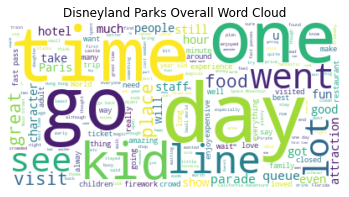

In [34]:
### Generate word clouds 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["park", "parks","ride","rides", "Disney", "Disneyland"])

### Disneyland Parks overall word cloud

text = " ".join(review for review in disneyland.Review_Text)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.title("Disneyland Parks Overall Word Cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



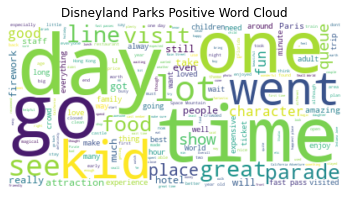

In [35]:
### Disneyland parks positive word cloud
pos = " ".join(review for review in positive.Review_Text)
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(pos)

plt.title("Disneyland Parks Positive Word Cloud")
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()



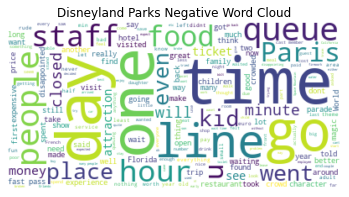

In [36]:
### negative word cloud
neg = " ".join(review for review in negative.Review_Text)
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(neg)

plt.title("Disneyland Parks Negative Word Cloud")
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

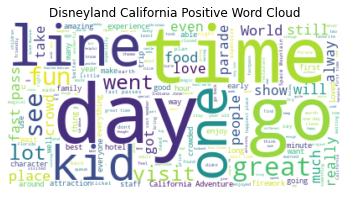

In [37]:
### Disneyland California positive word cloud 
pos1 = " ".join(review for review in ca_positive.Review_Text)
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white").generate(pos1)

plt.title("Disneyland California Positive Word Cloud")
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

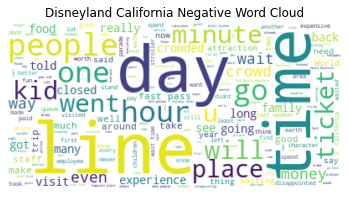

In [38]:
### Disneyland California negative word cloud 
neg1 = " ".join(review for review in ca_negative.Review_Text)
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white").generate(neg1)

plt.title("Disneyland California Negative Word Cloud")
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

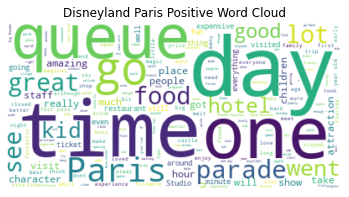

In [39]:
### Disneyland Paris positive word cloud 
pos2 = " ".join(review for review in paris_positive.Review_Text)
wordcloud5 = WordCloud(stopwords=stopwords, background_color="white").generate(pos2)

plt.title("Disneyland Paris Positive Word Cloud")
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

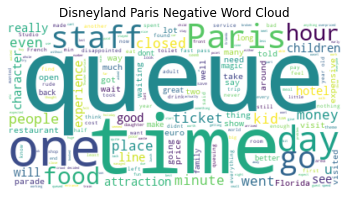

In [40]:
### Disneyland Paris negative word cloud 
neg2 = " ".join(review for review in paris_negative.Review_Text)
wordcloud6 = WordCloud(stopwords=stopwords, background_color="white").generate(neg2)

plt.title("Disneyland Paris Negative Word Cloud")
plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis("off")
plt.show()

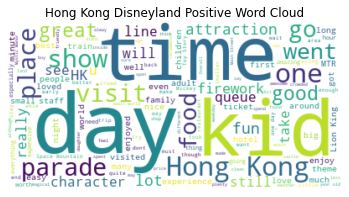

In [41]:
### Hong Kong Disneyland positive word cloud 
pos3 = " ".join(review for review in hk_positive.Review_Text)
wordcloud7 = WordCloud(stopwords=stopwords, background_color="white").generate(pos3)

plt.title("Hong Kong Disneyland Positive Word Cloud")
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis("off")
plt.show()

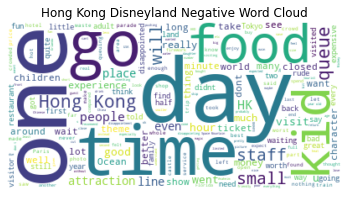

In [42]:
### Hong Kong Disneyland negative word cloud 
neg3 = " ".join(review for review in hk_negative.Review_Text)
wordcloud8 = WordCloud(stopwords=stopwords, background_color="white").generate(neg3)

plt.title("Hong Kong Disneyland Negative Word Cloud")
plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis("off")
plt.show()

# Splitting and Preprocessing

In [43]:
### Drop Rating column
disneyland.drop(columns=['Rating'], inplace = True)
paris.drop(columns=['Rating'], inplace = True)
hk.drop(columns=['Rating'], inplace = True)
ca.drop(columns=['Rating'], inplace = True)

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [45]:
reviews = disneyland['Review_Text'].values.tolist()
y = disneyland['sentiment'].values.tolist()

In [46]:
reviews_train, reviews_test, y_train, y_test = train_test_split(
    reviews, y, test_size=0.5, random_state=42)

In [47]:
tokenizer = keras.preprocessing.text.Tokenizer(oov_token = True)
tokenizer.fit_on_texts(reviews_train)

In [48]:
tokenizer.word_index

{True: 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'we': 7,
 'in': 8,
 'for': 9,
 'was': 10,
 'it': 11,
 'is': 12,
 'you': 13,
 'i': 14,
 'park': 15,
 'at': 16,
 'but': 17,
 'on': 18,
 'were': 19,
 'that': 20,
 'are': 21,
 'as': 22,
 'with': 23,
 'disney': 24,
 'rides': 25,
 'disneyland': 26,
 'so': 27,
 'have': 28,
 'there': 29,
 'not': 30,
 'all': 31,
 'time': 32,
 'this': 33,
 'day': 34,
 'be': 35,
 'my': 36,
 'had': 37,
 'get': 38,
 'they': 39,
 'if': 40,
 'our': 41,
 'go': 42,
 'very': 43,
 'one': 44,
 'can': 45,
 'ride': 46,
 'its': 47,
 'great': 48,
 'your': 49,
 'just': 50,
 'from': 51,
 'do': 52,
 'or': 53,
 'place': 54,
 'food': 55,
 'kids': 56,
 'would': 57,
 'which': 58,
 'will': 59,
 'more': 60,
 'when': 61,
 'some': 62,
 'good': 63,
 'an': 64,
 'really': 65,
 'only': 66,
 'out': 67,
 'like': 68,
 'visit': 69,
 'see': 70,
 'up': 71,
 'went': 72,
 'much': 73,
 'about': 74,
 'no': 75,
 'been': 76,
 'people': 77,
 'fast': 78,
 'also': 79,
 'fun': 80,
 'pass': 81,
 

In [49]:
reviews_train_tk = tokenizer.texts_to_matrix(reviews_train)
reviews_test_tk = tokenizer.texts_to_matrix(reviews_test)

In [50]:
reviews_train_tk

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Baseline model

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500)
logreg.fit(reviews_train_tk, y_train)
train_score = logreg.score(reviews_train_tk,y_train)
test_score = logreg.score(reviews_test_tk, y_test)

In [52]:
print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)

Train Accuracy: 0.9956320247163479
Test Accuracy: 0.9509427932246725


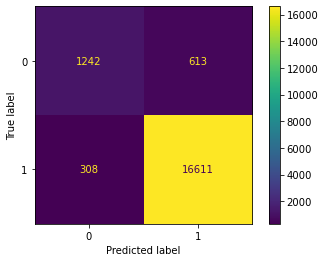

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, reviews_test_tk, y_test)  
plt.show() 



In [56]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(reviews_test_tk)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1855
           1       0.96      0.98      0.97     16919

    accuracy                           0.95     18774
   macro avg       0.88      0.83      0.85     18774
weighted avg       0.95      0.95      0.95     18774



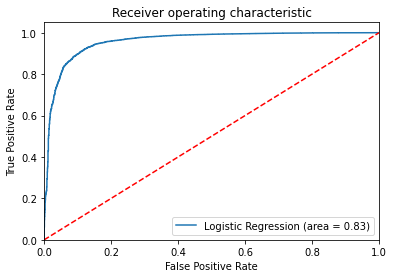

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(reviews_test_tk))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(reviews_test_tk)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [59]:
# Compare performance across park branches

parks = {'California': ca, 'Paris': paris, 'Hong Kong': hk}

for name, branch in parks.items():
    reviews = branch['Review_Text'].values.tolist()
    y = branch['sentiment'].values.tolist()
    
    reviews_tk = tokenizer.texts_to_matrix(reviews)
    
    score = logreg.score(reviews_tk, y)
    print('Score for the {} park: {:.4f}'.format(name, score))


Score for the California park: 0.9785
Score for the Paris park: 0.9620
Score for the Hong Kong park: 0.9778


# RNN model

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

reviews_train_tk = tokenizer.texts_to_sequences(reviews_train)
reviews_test_tk = tokenizer.texts_to_sequences(reviews_test)

max_length = 300

padded_reviews = pad_sequences(reviews_train_tk, maxlen=max_length, padding='post')

x_train, x_valid, y_train, y_valid = train_test_split(padded_reviews, y_train, test_size=0.20, shuffle= True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)

x_train = np.array([np.array(xi) for xi in x_train])
x_valid = np.array([np.array(xi) for xi in x_valid])



In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(
    input_dim = len(tokenizer.word_index) +1, 
    output_dim= 128,
    input_shape=[None],
    mask_zero=True))
model.add(keras.layers.Bidirectional(keras.layers.GRU(
    units = 64, dropout=0.4, recurrent_dropout=0.4)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
    metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs = 3, validation_data=(x_valid,y_valid),
                    callbacks=[es], batch_size = 10)
 

Epoch 1/3
1502/1502 [==============================] - 734s 486ms/step - loss: 0.2796 - accuracy: 0.9086 - val_loss: 0.1467 - val_accuracy: 0.9481
Epoch 2/3
1502/1502 [==============================] - 720s 479ms/step - loss: 0.0973 - accuracy: 0.9636 - val_loss: 0.1978 - val_accuracy: 0.9398
Epoch 3/3
1502/1502 [==============================] - 8680s 6s/step - loss: 0.0451 - accuracy: 0.9849 - val_loss: 0.2129 - val_accuracy: 0.9465


In [90]:
y_test = np.array(y_test)
x_test = pad_sequences(reviews_test_tk, maxlen=max_length, padding='post')

loss, accuracy = model.evaluate(x_test, y_test)
print("test loss:", loss)
print("test accuracy:", accuracy)



587/587 [==============================] - 33s 56ms/step - loss: 0.1901 - accuracy: 0.9451
test loss: 0.19007128477096558
test accuracy: 0.9451369047164917


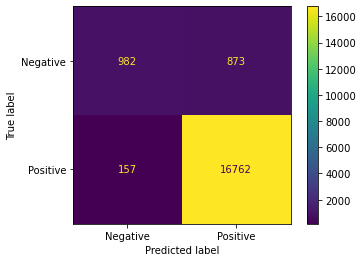

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_pred = model.predict(x_test)
y_pred = [1 * (x[0]>=0.5) for x in val_pred]
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [98]:
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.86      0.53      0.66      1855
           1       0.95      0.99      0.97     16919

    accuracy                           0.95     18774
   macro avg       0.91      0.76      0.81     18774
weighted avg       0.94      0.95      0.94     18774



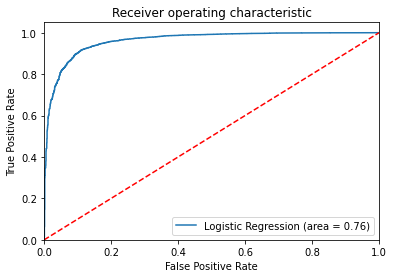

In [100]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, val_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [63]:
for name, branch in parks.items():
    reviews = branch['Review_Text'].values.tolist()
    y = branch['sentiment'].values.tolist()
        
    reviews_tk = tokenizer.texts_to_sequences(reviews)
    
    padded_test_reviews = pad_sequences(reviews_tk, maxlen=max_length, padding='post')

    y = np.array(y)

    results = model.evaluate(padded_test_reviews, y)
    print("{} park test loss, test acc:{}".format(name, results))

555/555 [==============================] - 66s 119ms/step - loss: 0.0986 - accuracy: 0.9714
California park test loss, test acc:[0.09859994053840637, 0.9713722467422485]
361/361 [==============================] - 1168s 3s/step - loss: 0.1673 - accuracy: 0.9511
Paris park test loss, test acc:[0.16731922328472137, 0.9510695338249207]
258/258 [==============================] - 42s 164ms/step - loss: 0.1129 - accuracy: 0.9713
Hong Kong park test loss, test acc:[0.11288812011480331, 0.971290111541748]


# Adjust Dataset

In [108]:
disney = pd.read_csv("DisneylandReviews.csv")
disney.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [114]:
disney = disney.loc[disney['Rating'] != 3]
disney['sentiment'] = disney['Rating'].apply(lambda rating : +1 if rating > 3 else 0)

disney.drop(columns=['Year_Month','Reviewer_Location','Review_ID'], inplace = True)

In [116]:
disney.groupby(["Branch", "sentiment"]).size()

Branch                 sentiment
Disneyland_California  0             1246
                       1            16499
Disneyland_HongKong    0              508
                       1             7747
Disneyland_Paris       0             1872
                       1             9675
dtype: int64

In [139]:
dis = disney.groupby('sentiment').apply(lambda x: x.sample(3626)).reset_index(drop=True)

In [140]:
dis.groupby(["Branch", "sentiment"]).size()

Branch                 sentiment
Disneyland_California  0            1246
                       1            1721
Disneyland_HongKong    0             508
                       1             855
Disneyland_Paris       0            1872
                       1            1050
dtype: int64

In [143]:
dis.drop(columns=['Rating','Branch'], inplace = True)


In [146]:
reviews = dis['Review_Text'].values.tolist()
y = dis['sentiment'].values.tolist()


In [147]:
reviews_train, reviews_test, y_train, y_test = train_test_split(
    reviews, y, test_size=0.2, random_state=42)


In [148]:
tokenizer = keras.preprocessing.text.Tokenizer(oov_token = True)
tokenizer.fit_on_texts(reviews_train)


In [149]:
reviews_train_tk = tokenizer.texts_to_matrix(reviews_train)
reviews_test_tk = tokenizer.texts_to_matrix(reviews_test)


## Logistic Regression

In [150]:
logreg2 = LogisticRegression(max_iter=500)
logreg2.fit(reviews_train_tk, y_train)
train_score = logreg2.score(reviews_train_tk,y_train)
test_score = logreg2.score(reviews_test_tk, y_test)

In [151]:
print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)

Train Accuracy: 0.9974142389243233
Test Accuracy: 0.9048931771192281


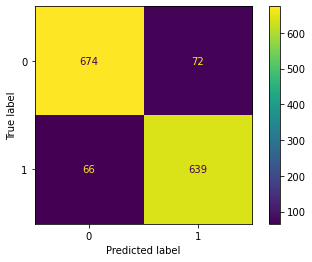

In [152]:
plot_confusion_matrix(logreg2, reviews_test_tk, y_test)  
plt.show() 

In [153]:
y_pred = logreg2.predict(reviews_test_tk)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.91      0.90      0.91       746
           1       0.90      0.91      0.90       705

    accuracy                           0.90      1451
   macro avg       0.90      0.90      0.90      1451
weighted avg       0.90      0.90      0.90      1451



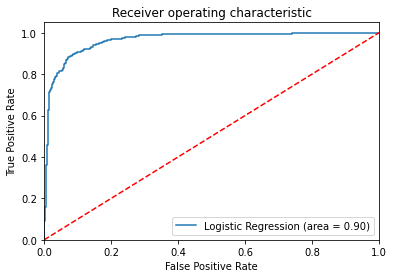

In [155]:
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(reviews_test_tk))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(reviews_test_tk)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



# RNN Model

In [156]:
reviews_train_tk = tokenizer.texts_to_sequences(reviews_train)
reviews_test_tk = tokenizer.texts_to_sequences(reviews_test)

max_length = 300

padded_reviews = pad_sequences(reviews_train_tk, maxlen=max_length, padding='post')

x_train, x_valid, y_train, y_valid = train_test_split(padded_reviews, y_train, test_size=0.20, shuffle= True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)

x_train = np.array([np.array(xi) for xi in x_train])
x_valid = np.array([np.array(xi) for xi in x_valid])



In [175]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Embedding(
    input_dim = len(tokenizer.word_index) +1, 
    output_dim= 128,
    input_shape=[None],
    mask_zero=True))
model2.add(keras.layers.GRU(
    units = 128))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam',
    metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model2.fit(x_train, y_train, epochs = 10, validation_data=(x_valid,y_valid),
                    callbacks=[es], batch_size = 10)


Epoch 1/10
464/464 [==============================] - 44s 91ms/step - loss: 0.6300 - accuracy: 0.6262 - val_loss: 0.3315 - val_accuracy: 0.8674
Epoch 2/10
464/464 [==============================] - 48s 104ms/step - loss: 0.2429 - accuracy: 0.9099 - val_loss: 0.3224 - val_accuracy: 0.8699
Epoch 3/10
464/464 [==============================] - 50s 108ms/step - loss: 0.1294 - accuracy: 0.9524 - val_loss: 0.3625 - val_accuracy: 0.8742
Epoch 4/10
464/464 [==============================] - 50s 107ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.5228 - val_accuracy: 0.8200
Epoch 5/10
464/464 [==============================] - 48s 104ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.4417 - val_accuracy: 0.8699
Epoch 6/10
464/464 [==============================] - 51s 110ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.4861 - val_accuracy: 0.8630
Epoch 7/10
464/464 [==============================] - 51s 109ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.6137 - val_acc

In [176]:
y_test = np.array(y_test)
x_test = pad_sequences(reviews_test_tk, maxlen=max_length, padding='post')

loss, accuracy = model2.evaluate(x_test, y_test)
print("test loss:", loss)
print("test accuracy:", accuracy)



46/46 [==============================] - 1s 31ms/step - loss: 0.6030 - accuracy: 0.8635
test loss: 0.6029616594314575
test accuracy: 0.863542377948761


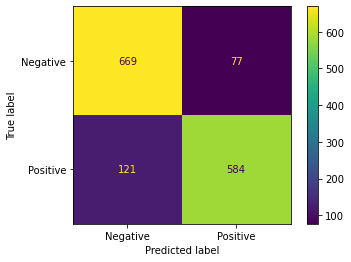

In [178]:
val_pred = model2.predict(x_test)
y_pred = [1 * (x[0]>=0.5) for x in val_pred]
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       746
           1       0.88      0.83      0.86       705

    accuracy                           0.86      1451
   macro avg       0.87      0.86      0.86      1451
weighted avg       0.86      0.86      0.86      1451



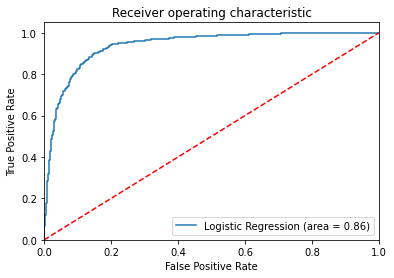

In [180]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, val_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Test With New Data

In [ ]:
### Scrape 10 reviews from each park from Google Reviews


1    33921
0     3626
Name: sentiment, dtype: int64

Exception: Response status code: 401